## ARIMA

AR + I + MA

AutoRegression
Integrated
Moving Average

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
import pandas_datareader as pdr

%matplotlib inline

In [5]:
df_tesla=pdr.get_data_yahoo('TSLA')

In [6]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-13,21.120001,19.940666,20.008667,21.026667,113773500.0,21.026667
2017-11-14,21.090000,20.459999,21.000000,20.580000,85141500.0,20.580000
2017-11-15,20.832666,20.100000,20.400667,20.753332,89680500.0,20.753332
2017-11-16,21.209333,20.753332,20.932667,20.833332,87331500.0,20.833332
2017-11-17,21.778000,20.876667,21.711332,21.003332,206026500.0,21.003332
...,...,...,...,...,...,...
2022-11-07,208.899994,196.660004,208.649994,197.080002,93916500.0,197.080002
2022-11-08,195.199997,186.750000,194.020004,191.300003,128803400.0,191.300003
2022-11-09,195.889999,177.119995,190.779999,177.589996,127062700.0,177.589996


In [7]:
df_tesla.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-13,21.120001,19.940666,20.008667,21.026667,113773500.0,21.026667
2017-11-14,21.090000,20.459999,21.000000,20.580000,85141500.0,20.580000
2017-11-15,20.832666,20.100000,20.400667,20.753332,89680500.0,20.753332
2017-11-16,21.209333,20.753332,20.932667,20.833332,87331500.0,20.833332
2017-11-17,21.778000,20.876667,21.711332,21.003332,206026500.0,21.003332


In [9]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-07,208.899994,196.660004,208.649994,197.080002,93916500.0,197.080002
2022-11-08,195.199997,186.750000,194.020004,191.300003,128803400.0,191.300003
2022-11-09,195.889999,177.119995,190.779999,177.589996,127062700.0,177.589996
2022-11-10,191.000000,180.029999,189.899994,190.720001,132703000.0,190.720001
2022-11-11,196.520004,182.589996,186.000000,195.970001,114229200.0,195.970001


In [10]:
df_tesla.dropna(axis=0,inplace=True)

In [11]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-11-13 to 2022-11-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   float64
 5   Adj Close  1259 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


In [12]:
#df_tesla['Month']=pd.to_datetime(df_tesla['Month'])
df_tesla=df_tesla.reset_index()

In [74]:
df_tesla

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-10-12,23.985332,23.509333,23.530001,23.712000,61305000.0,23.712000
1,2017-10-13,23.899332,23.578667,23.798668,23.704666,53107500.0,23.704666
2,2017-10-16,23.632000,23.143999,23.584000,23.373333,80632500.0,23.373333
3,2017-10-17,23.747999,23.337999,23.393999,23.716667,49399500.0,23.716667
4,2017-10-18,24.200001,23.608667,23.731333,23.976667,74086500.0,23.976667
...,...,...,...,...,...,...,...
1253,2022-10-05,246.669998,233.270004,245.009995,240.809998,86982700.0,240.809998
1254,2022-10-06,244.580002,235.350006,239.440002,238.130005,69298400.0,238.130005
1255,2022-10-07,234.570007,222.020004,233.940002,223.070007,83592300.0,223.070007
1256,2022-10-10,226.990005,218.360001,223.929993,222.960007,67925000.0,222.960007


In [13]:
df_tesla=df_tesla.set_index('Date',drop=True)

<AxesSubplot:xlabel='Date'>

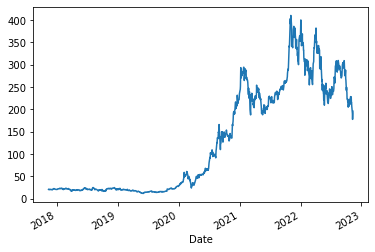

In [15]:
df_tesla['Close'].plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1]<=0.05:
        print("reject null hypothesis,strong evi against null hypo, has unit root<1, stat")
    else:
        print("reject alternate hypothesis, weak evi against null hypo, has unit root=1,non stat")

In [18]:
adf_test(df_tesla['Open'])

ADF Statistics: -1.1522490213048941
p- value: 0.6937925822404833
reject alternate hypothesis, weak evi against null hypo, has unit root=1,non stat


In [19]:
df_tesla['First Diff']=df_tesla['Open']-df_tesla['Open'].shift(1)

In [81]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close,First Diff
Date,,,,,,,
2017-10-12,23.985332,23.509333,23.530001,23.712000,61305000.0,23.712000,NaN
2017-10-13,23.899332,23.578667,23.798668,23.704666,53107500.0,23.704666,0.268667
2017-10-16,23.632000,23.143999,23.584000,23.373333,80632500.0,23.373333,-0.214668
2017-10-17,23.747999,23.337999,23.393999,23.716667,49399500.0,23.716667,-0.190001
2017-10-18,24.200001,23.608667,23.731333,23.976667,74086500.0,23.976667,0.337334
...,...,...,...,...,...,...,...
2022-10-05,246.669998,233.270004,245.009995,240.809998,86982700.0,240.809998,-5.510010
2022-10-06,244.580002,235.350006,239.440002,238.130005,69298400.0,238.130005,-5.569992
2022-10-07,234.570007,222.020004,233.940002,223.070007,83592300.0,223.070007,-5.500000


In [20]:
adf_test(df_tesla['First Diff'].dropna())

ADF Statistics: -6.44675099200612
p- value: 1.5590299496112582e-08
reject null hypothesis,strong evi against null hypo, has unit root<1, stat


In [21]:
#do more diff if not stat
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

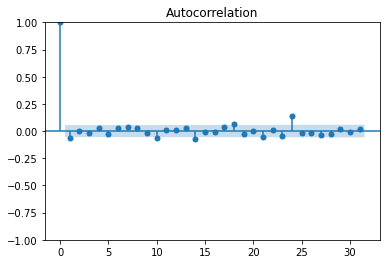

In [22]:
acf = plot_acf(df_tesla['First Diff'].dropna())

D:\Annaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


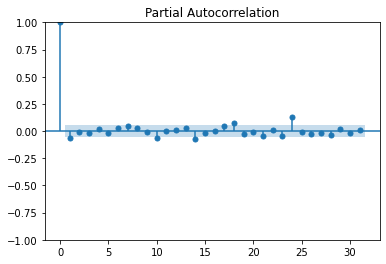

In [23]:
pacf = plot_pacf(df_tesla['First Diff'].dropna())

In [24]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close,First Diff
Date,,,,,,,
2017-11-13,21.120001,19.940666,20.008667,21.026667,113773500.0,21.026667,NaN
2017-11-14,21.090000,20.459999,21.000000,20.580000,85141500.0,20.580000,0.991333
2017-11-15,20.832666,20.100000,20.400667,20.753332,89680500.0,20.753332,-0.599333
2017-11-16,21.209333,20.753332,20.932667,20.833332,87331500.0,20.833332,0.532000
2017-11-17,21.778000,20.876667,21.711332,21.003332,206026500.0,21.003332,0.778666
...,...,...,...,...,...,...,...
2022-11-07,208.899994,196.660004,208.649994,197.080002,93916500.0,197.080002,-13.950012
2022-11-08,195.199997,186.750000,194.020004,191.300003,128803400.0,191.300003,-14.629990
2022-11-09,195.889999,177.119995,190.779999,177.589996,127062700.0,177.589996,-3.240005


In [57]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,10,11)
test_dataset_end=datetime(2022,11,11)

In [58]:
train_data=df_tesla[:train_dataset_end]
test_data=df_tesla[train_dataset_end+timedelta(days=1):test_dataset_end]

In [59]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [60]:
test_data

,High,Low,Open,Close,Volume,Adj Close,First Diff,forecast
Date,,,,,,,,
2021-10-12,270.773346,265.523346,266.976654,268.573334,66060000.0,268.573334,4.426666,NaN
2021-10-13,271.803345,268.593323,270.156677,270.359985,42360300.0,270.359985,3.180023,NaN
2021-10-14,273.416656,271.116669,271.829987,272.773346,36741600.0,272.773346,1.673309,NaN
2021-10-15,281.070007,274.116669,274.579987,281.010010,56773800.0,281.010010,2.750000,NaN
2021-10-18,291.753326,283.823334,283.929993,290.036682,72621600.0,290.036682,9.350006,NaN
...,...,...,...,...,...,...,...,...
2022-11-07,208.899994,196.660004,208.649994,197.080002,93916500.0,197.080002,-13.950012,NaN
2022-11-08,195.199997,186.750000,194.020004,191.300003,128803400.0,191.300003,-14.629990,NaN
2022-11-09,195.889999,177.119995,190.779999,177.589996,127062700.0,177.589996,-3.240005,NaN


In [61]:
train_data

,High,Low,Open,Close,Volume,Adj Close,First Diff,forecast
Date,,,,,,,,
2017-11-13,21.120001,19.940666,20.008667,21.026667,113773500.0,21.026667,NaN,0.000000
2017-11-14,21.090000,20.459999,21.000000,20.580000,85141500.0,20.580000,0.991333,20.008637
2017-11-15,20.832666,20.100000,20.400667,20.753332,89680500.0,20.753332,-0.599333,20.999985
2017-11-16,21.209333,20.753332,20.932667,20.833332,87331500.0,20.833332,0.532000,20.400663
2017-11-17,21.778000,20.876667,21.711332,21.003332,206026500.0,21.003332,0.778666,20.932664
...,...,...,...,...,...,...,...,...
2021-10-05,265.769989,258.066681,261.600006,260.196655,55297800.0,260.196655,-3.899994,NaN
2021-10-06,262.220001,257.739990,258.733337,260.916656,43898400.0,260.916656,-2.866669,NaN
2021-10-07,268.333344,261.126678,261.820007,264.536682,57587400.0,264.536682,3.086670,NaN


In [62]:
from statsmodels.tsa.arima.model import ARIMA
model_Arima = ARIMA(train_data['Open'],order=(6,1,4))

D:\Annaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Annaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Annaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [63]:
model_fit=model_Arima.fit()

D:\Annaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Annaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Annaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  984
Model:                 ARIMA(6, 1, 4)   Log Likelihood               -2860.857
Date:                Sat, 12 Nov 2022   AIC                           5743.713
Time:                        12:56:16   BIC                           5797.510
Sample:                             0   HQIC                          5764.177
                                - 984                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2461      0.042      5.824      0.000       0.163       0.329
ar.L2         -0.5001      0.046    -10.937      0.000      -0.590      -0.410
ar.L3          0.2043      0.041      5.014      0.000       0.124       0.284
ar.L4         -0.8840      0.035    -25.267      0.000      -0.953      -0.815
ar.L5         -0.1074      0.025     -4.326      0.000      -0.156      -0.059
ar.L6         -0.0173      0.023     -0.746      0.455      -0.063       0.028
ma.L1         -0.3256      0.035     -9.227      0.000      -0.395      -0.256
ma.L2          0.4429      0.039     11.275      0.000       0.366       0.520
ma.L3         -0.1978      0.037     -5.309      0.000      -0.271      -0.125
ma.L4          0.8540      0.032     26.982      0.000       0.792       0.916
sigma2        19.6864      0.401     49.044      0.000      18.900      20.473
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4093.69
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):             107.22   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

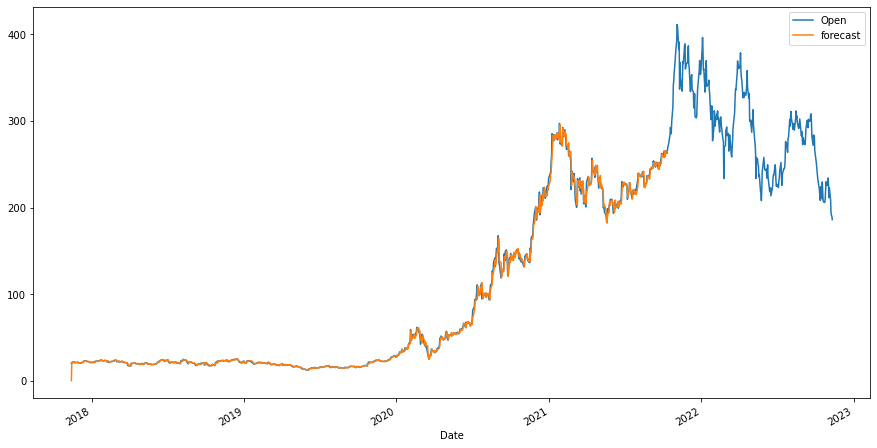

In [65]:
df_tesla['forecast']=model_fit.predict()
df_tesla[['Open','forecast']].plot(figsize=(15,8))

In [66]:
df_tesla.drop(['forecast'],axis=1)

,High,Low,Open,Close,Volume,Adj Close,First Diff
Date,,,,,,,
2017-11-13,21.120001,19.940666,20.008667,21.026667,113773500.0,21.026667,NaN
2017-11-14,21.090000,20.459999,21.000000,20.580000,85141500.0,20.580000,0.991333
2017-11-15,20.832666,20.100000,20.400667,20.753332,89680500.0,20.753332,-0.599333
2017-11-16,21.209333,20.753332,20.932667,20.833332,87331500.0,20.833332,0.532000
2017-11-17,21.778000,20.876667,21.711332,21.003332,206026500.0,21.003332,0.778666
...,...,...,...,...,...,...,...
2022-11-07,208.899994,196.660004,208.649994,197.080002,93916500.0,197.080002,-13.950012
2022-11-08,195.199997,186.750000,194.020004,191.300003,128803400.0,191.300003,-14.629990
2022-11-09,195.889999,177.119995,190.779999,177.589996,127062700.0,177.589996,-3.240005


In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [68]:
model_sarima = SARIMAX(train_data['Open'],order=(1,1,1),seasonal_order=(1,1,1,12))

D:\Annaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Annaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [69]:
results=model_sarima.fit()

<AxesSubplot:xlabel='Date'>

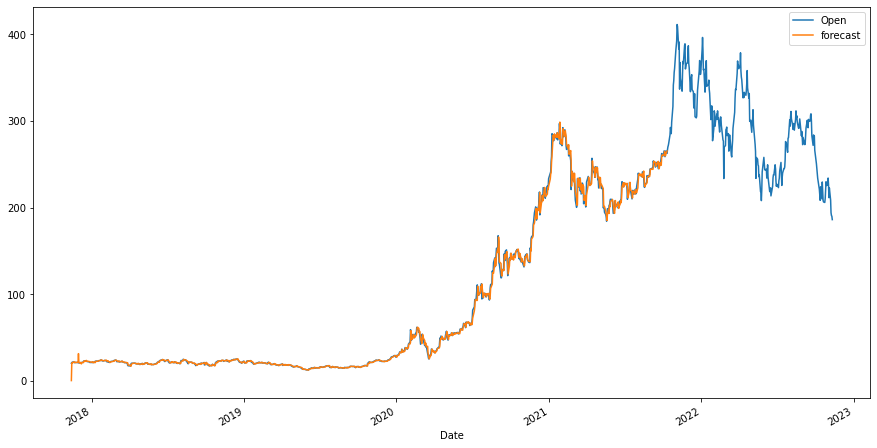

In [70]:
df_tesla['forecast']=results.predict()
df_tesla[['Open','forecast']].plot(figsize=(15,8))

In [71]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_tesla.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [72]:
future_dates

[Timestamp('2022-11-11 00:00:00'),
 Timestamp('2022-12-11 00:00:00'),
 Timestamp('2023-01-11 00:00:00'),
 Timestamp('2023-02-11 00:00:00'),
 Timestamp('2023-03-11 00:00:00'),
 Timestamp('2023-04-11 00:00:00'),
 Timestamp('2023-05-11 00:00:00'),
 Timestamp('2023-06-11 00:00:00'),
 Timestamp('2023-07-11 00:00:00'),
 Timestamp('2023-08-11 00:00:00'),
 Timestamp('2023-09-11 00:00:00'),
 Timestamp('2023-10-11 00:00:00'),
 Timestamp('2023-11-11 00:00:00'),
 Timestamp('2023-12-11 00:00:00'),
 Timestamp('2024-01-11 00:00:00'),
 Timestamp('2024-02-11 00:00:00'),
 Timestamp('2024-03-11 00:00:00'),
 Timestamp('2024-04-11 00:00:00'),
 Timestamp('2024-05-11 00:00:00'),
 Timestamp('2024-06-11 00:00:00'),
 Timestamp('2024-07-11 00:00:00'),
 Timestamp('2024-08-11 00:00:00'),
 Timestamp('2024-09-11 00:00:00'),
 Timestamp('2024-10-11 00:00:00')]

In [73]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_tesla.columns)
future_datest_df.tail()

,High,Low,Open,Close,Volume,Adj Close,First Diff,forecast
2024-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
future_df=pd.concat([df_tesla,future_datest_df])

<AxesSubplot:>

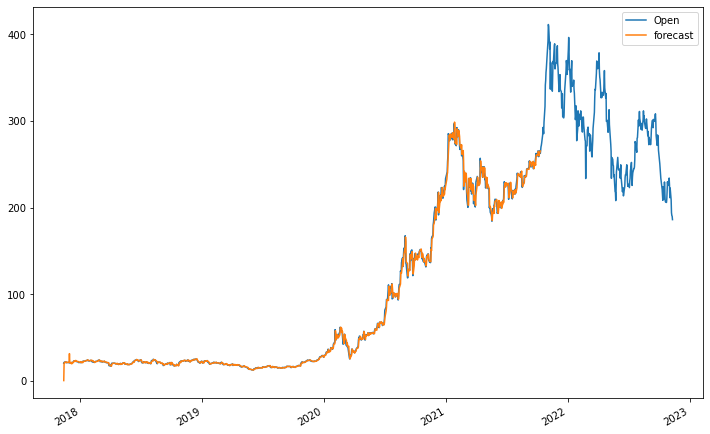

In [75]:
future_df['forecast'] = results.predict()  
future_df[['Open', 'forecast']].plot(figsize=(12, 8))

In [76]:
future_df

,High,Low,Open,Close,Volume,Adj Close,First Diff,forecast
2017-11-13,21.120001,19.940666,20.008667,21.026667,113773500.0,21.026667,NaN,0.000000
2017-11-14,21.090000,20.459999,21.000000,20.580000,85141500.0,20.580000,0.991333,20.008636
2017-11-15,20.832666,20.100000,20.400667,20.753332,89680500.0,20.753332,-0.599333,20.999985
2017-11-16,21.209333,20.753332,20.932667,20.833332,87331500.0,20.833332,0.532000,20.400663
2017-11-17,21.778000,20.876667,21.711332,21.003332,206026500.0,21.003332,0.778666,20.932664
...,...,...,...,...,...,...,...,...
2024-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
